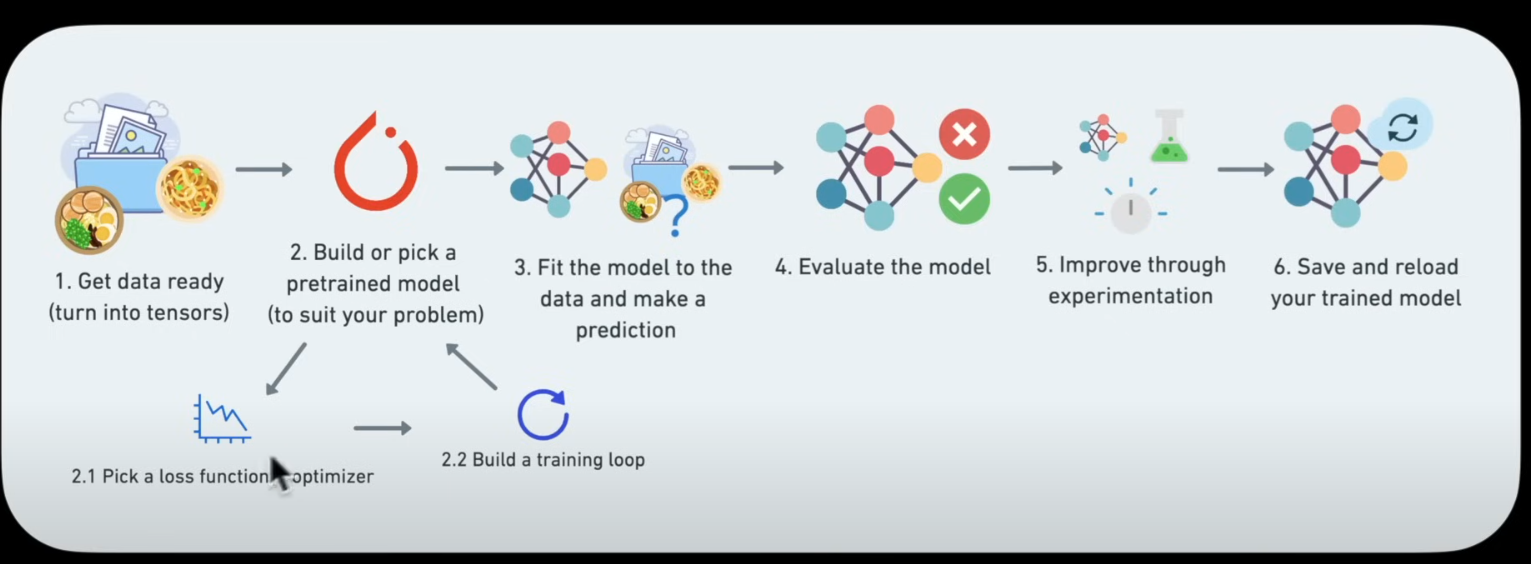

In [1]:
covering = {1: "data (prepare and load)",
            2: "build model",
            3: ";fitting the model to the data",
            4: "evaluate model",
            5: "make predictions and put together"}

from IPython.display import Image
img = '/Pytorch/Images/ML_process.png'
ML_process = Image(img, width=750, height=750)
ML_process

In [2]:
import torch
from torch import nn # nn  containing all of pytorch building blocks
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Data preparing and loading data
This can be anything
* excel sheet
* images
* videos
* audio files
* DNA 
* Text 

Machine learning is two parts
1. getting the data into numbers
2. Creating a model that finds patterns in those numbers 

In [3]:
# creating known parameters
weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # X capital 'X' is for a matrix while a lower case is for a tensor
y = weight * X + bias
X[:10] , y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
len(X), len(y)

(50, 50)

# Splitting data into taring and test sets(one of the most important concepts in machine learning)

In [5]:
# spliting and training data
# X[:train] from start to the 80% mark 
# X[train:] from the end of the train mark to finish of numbers
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] #this trains data up until the train split
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test) 

(40, 40, 10, 10)

# Matplotlib

In [6]:
# making the numbers visual 

def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    prediction = None):
    """Plots training data, test dat and compares predictions"""
    plt.figure(figsize=(10,7))
    # plot training dat in blue
    plt.scatter(train_data,
                train_labels,
                c="b",
                s=4,
                label="Training data")
    #plot in red
    plt.scatter(test_data, # Bring in data
               test_labels, # bring in data 
               c="g", # color of the line
               s=4, # font size 
               label="Testing data") # label
    #predictions
    if prediction is not None:
        # Plot the predictions if the data exist
        plt.scatter(test_data,prediction, c="r", s=4, label="prediction")

    # Show the legend
    plt.legend(prop={"size":14})    

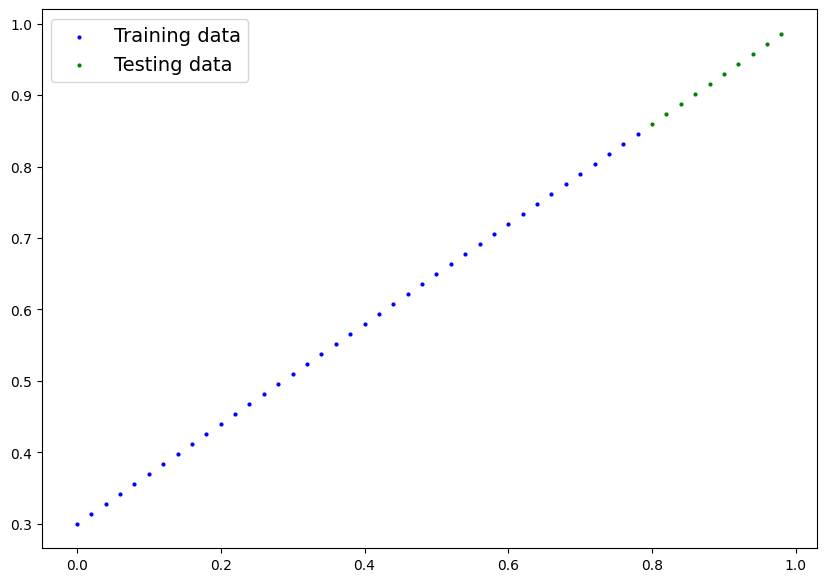

In [7]:
plot_predictions()

The purpose of this model is:
* start with random values (weight and bias)
* look at training data and adjust the random values to better represent the ideal values 
    (the weight and bias values we used to create the data)

It does this through two things:
1. Gradient descent 
2. Backpropagation 

If you are going to subclass the model then you must override the forward method. 

In [8]:
# Creating linear regression model classes
# This is a model created from known training data, note that sometimes you will not know the training data.
class LinearRegressionModel(nn.Module): # most things int pytorch inherit from nn.Module
    def __init__(self): # __init__ is something that has to be there take it as a constructor
        super().__init__() # super().init__() allows child classes to invoke the constructor ^
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, # if the model requires a grad (by default this is true)
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, # if the model requires a grad (by default this is true)
                                                dtype=torch.float))

        # Forward method that will define the computation in the model
        # almost all nn.module needs a forward method. It is the operation that happens
    def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input data
        return self.weights * x + self.bias # linear regression formula 

# Pytorch model building essentially's 

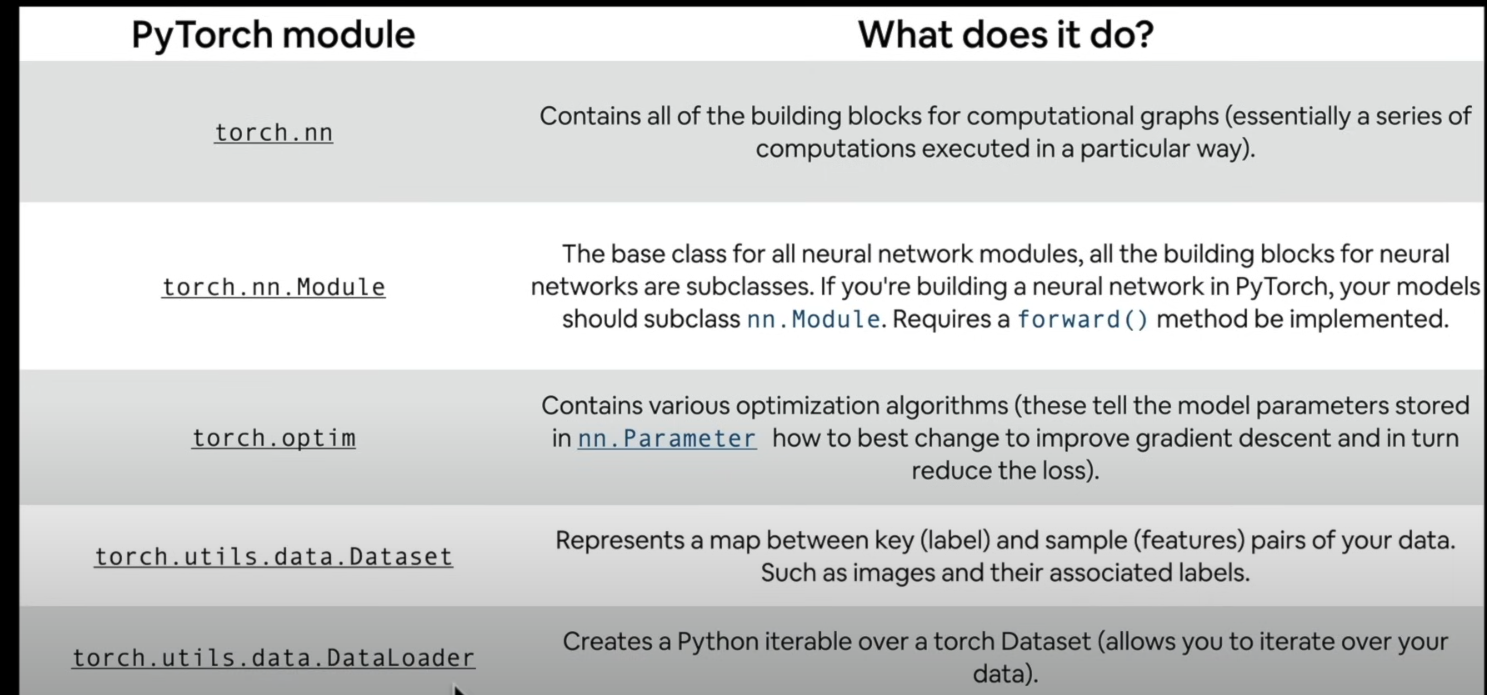

In [9]:
# Importing image from another folder
from IPython.display import Image
img = '/Pytorch/Images/nn_modules.png'
nn_modules = Image(img, width=750, height=750)
nn_modules

In [10]:
# contains of previous model
torch.manual_seed(42)
#calling the model we created
model_0 = LinearRegressionModel()

#Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [11]:
#list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In most cases you do not know what the ideal values are, but for this model we know those vales. 

The idea is to get as close as possible to these values. 

* Whole idea of deep learning is to start with random values and get those values to become less random and more 
along the lines of a pattern. 

In [12]:
# the original values
weight, bias

(0.7, 0.3)

# making predictions using 'torch.inference_model()'

To check our model's predictivve power, lets see how well it predicts y_test based on x_test

When data is passed through the model it is going to 
run it through the forward method.

In [13]:
# Making predictions with our model
with torch.inference_mode(): # inference removes tracking of gradients. pytorch keeps track of less things so inturn it makes the code faster. 
    y_preds = model_0(X_test)
y_preds

#same thing, but inference mode if preferred. 
# with torch.no_grad():
#     y_preds = model_0(X_test)
# y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

If getting an not implement error than make sure that your forward method is not within the __init__ method
weight and bias 

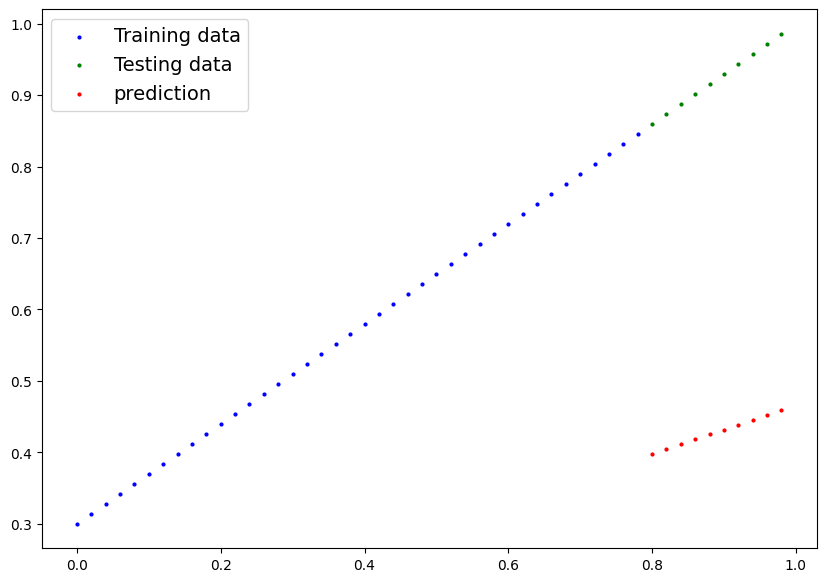

In [14]:
# making a visual representation
plot_predictions(prediction= y_preds) # calling previous made method with prediction

# Training the model

This training wil move from an *unknown* parameters (these may random) to some *known* parameters

or in other words from a poor representation to a better one.

# Measuring how the predictions went.
* The lower the better  


**loss function:** a function to measure how wrong the models predictions are.
 
        *The lower the better. 

**optimizer:** Takes into account the loss of a model and adjusts the model's parameter to improve the performance of the loss function. 

In [15]:
# checking out the model parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [16]:
# pytorch using loss functions (cost and criterion is the same thing)
loss_fn = nn.L1Loss()

# setting up an optimizer torch.optim
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.01) # lr = learning rate. This is the most important hyperparameter that can be set. 

Finding out what optimizer to use is mostly just trial and error. 

# Building a training loop (and a testing loop)

A couple of things we need in a training loop:
1. first loop through the data. 
2. then Forward pass (this involves data moving through our model's `forward()` function(s)). This is to make predictions. - also called a forward propagation
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. optimizer zero grad
* **Key Factors**
5. loss backward - moves backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
6. optimizer step - use the optimizer to adjust our model's parameters ot try and improve the loss. (**Gradient descent**) 

In [17]:
# Epochs is one loop through the data...
# because we set this data this is a hyperparameter. 
epochs = 1

# step 1 looping the data
for epoch in range(epochs):
    # Setting the model to train
    model_0.train() # train mode in pytorch sets all parameters that require gradients to require gradients
    model_0.eval() # turns off the gradient tracking. 
    
    # step 2 forward pass
    y_preds = model_0(X_train)

    # step 3 Calculating the loss
    loss = loss_fn(y_preds, y_train) # this is the loss function. ** (input, target) 

    # step 4 Optimizer zero grad
    optimizer.zero_grad() # zeroing the gradients so that the optimizer doesn't add up the gradients from the previous step.

    # step 5 backpropagation on the loss respect to  
    loss.backward() # calculates the gradients of each of the parameters of our model with respect to the loss.

    # step 6 step the optimizer(performs gradient descent)
